In [18]:
import pandas as pd
import numpy as np
df=pd.read_csv("Housing.csv")
print(df)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [19]:
print(f"The shape is:{df.shape}")
print("The first 5 rows are: ")
print(df.head(5))

The shape is:(545, 13)
The first 5 rows are: 
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [20]:
# Define which columns are binary (yes/no)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                  'airconditioning', 'prefarea']

# Define which column needs one-hot encoding
categorical_columns = ['furnishingstatus']

# Apply binary mapping only to yes/no columns
binary_map = {'yes': 1, 'no': 0}
for col in binary_columns:
    df[col] = df[col].map(binary_map)

# One-hot encode the multi-category column
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nAfter encoding:")
print(df.head())


After encoding:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1      

In [21]:
X = df.drop('price', axis=1)
y = df['price']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]}, Testing set size: {X_test.shape[0]}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Training set size: 436, Testing set size: 109


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)

print("\n✅Models trained successfully!")

# === 6. Predictions ===
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_gb = gb_model.predict(X_test_scaled)


✅ Models trained successfully!


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{name} Performance:")
    print(f"  MAE:  {mae:,.2f}")
    print(f"  RMSE: {rmse:,.2f}")
    print(f"  R²:   {r2:.3f}")
    return mae, rmse,r2

# Evaluate both models
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")



Linear Regression Performance:
  MAE:  970,043.40
  RMSE: 1,324,506.96
  R²:   0.653

Gradient Boosting Performance:
  MAE:  960,578.78
  RMSE: 1,299,761.15
  R²:   0.666


(960578.7795232662, 1299761.146244725, 0.6657719736897354)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


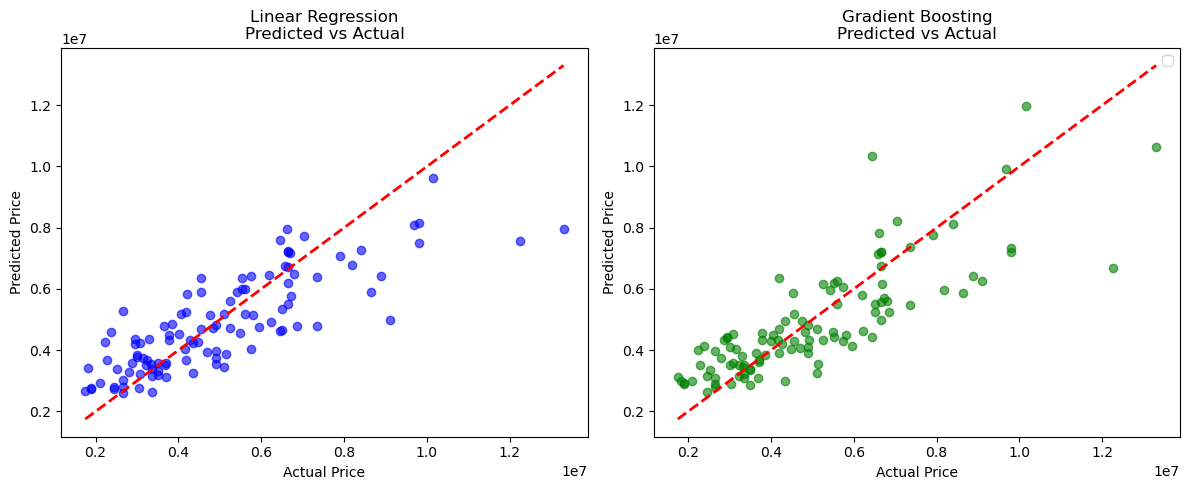

In [27]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression\nPredicted vs Actual')

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Gradient Boosting\nPredicted vs Actual')
plt.legend()

plt.tight_layout()
plt.show()
